<a href="https://colab.research.google.com/github/Imadittyaa/coffee-sales/blob/main/coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d1=pd.read_csv('https://raw.githubusercontent.com/Imadittyaa/coffee-sales/main/index_1.csv')
d2=pd.read_csv('https://raw.githubusercontent.com/Imadittyaa/coffee-sales/main/index_2.csv')
data=pd.concat([d1,d2],ignore_index=True)
data.shape

(3899, 6)

# Infomation of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3899 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3896 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.9+ KB


In [4]:
data.head(n=21)

,date,datetime,cash_type,card,money,coffee_name
0,3/1/2024,3/1/2024 10:15,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/2024,3/1/2024 12:19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/2024,3/1/2024 12:20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/2024,3/1/2024 13:46,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/2024,3/1/2024 13:48,card,ANON-0000-0000-0004,38.7,Latte
5,3/1/2024,3/1/2024 15:39,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,3/1/2024,3/1/2024 16:19,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,3/1/2024,3/1/2024 18:39,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,3/1/2024,3/1/2024 19:22,card,ANON-0000-0000-0008,38.7,Cocoa
9,3/1/2024,3/1/2024 19:23,card,ANON-0000-0000-0008,33.8,Americano with Milk


# Some operations on data

In [5]:
data.rename(columns={'datetime':'time'},inplace=True)
data['time']=data['time'].str[-5:]

In [6]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

In [7]:
cash_data=data[data['cash_type'].str.lower()=='cash'].reset_index(drop=True)
card_data=data[data['cash_type'].str.lower()=='card'].reset_index(drop=True)

**Cleared coffee sales data**

In [8]:
data.head(n=21)

,date,time,cash_type,card,money,coffee_name
0,2024-03-01,10:15,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,12:19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,12:20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,13:46,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,13:48,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,15:39,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,16:19,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,18:39,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,19:22,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,19:23,card,ANON-0000-0000-0008,33.8,Americano with Milk


# Data divide on basis of payment method

**cash_data actually denote to data on basis of payment by cash and card_data actually data on basis of payment by card**

In [10]:
cash_data.head(n=21)

,date,time,cash_type,card,money,coffee_name
0,2024-03-02,10:30,cash,NaN,40.0,Latte
1,2024-03-03,10:10,cash,NaN,40.0,Latte
2,2024-03-06,12:30,cash,NaN,35.0,Americano with Milk
3,2024-03-07,10:08,cash,NaN,40.0,Latte
4,2024-03-07,11:25,cash,NaN,40.0,Latte
5,2024-03-09,11:49,cash,NaN,40.0,Hot Chocolate
6,2024-03-10,7:44,cash,NaN,30.0,Americano
7,2024-03-10,7:45,cash,NaN,35.0,Americano with Milk
8,2024-03-10,10:06,cash,NaN,40.0,Latte
9,2024-03-10,17:51,cash,NaN,35.0,Americano with Milk


In [ ]:
len(cash_data)

169

**sales by cash payment method is 169**

In [9]:
card_data.head(n=21)

,date,time,cash_type,card,money,coffee_name
0,2024-03-01,10:15,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,12:19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,12:20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,13:46,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,13:48,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,15:39,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,16:19,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,18:39,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,19:22,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,19:23,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [ ]:
len(card_data)

3729

**Sales by card payment method is 3729**

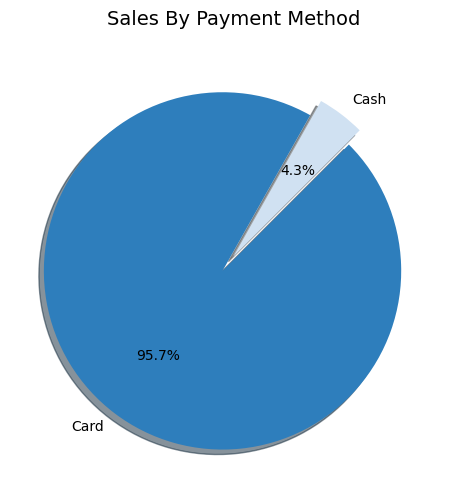

In [20]:
plt.figure(figsize=(5,5))
plt.pie(
    [len(cash_data),len(card_data)],
    labels=['Cash','Card'],
    autopct='%1.1f%%',
    startangle=45,
    colors=plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 2)),
    shadow=True,
    explode=(0, 0.1)
)
plt.title('Sales By Payment Method',fontsize=14)
plt.tight_layout()
plt.show()

# on comparing of cash_data and card_data

In [13]:
cash_prices=cash_data.groupby('coffee_name')['money'].apply(lambda x:sorted (set(x))).reset_index(name='cash_prices')

In [14]:
card_prices=card_data.groupby('coffee_name')['money'].apply(lambda x:sorted (set(x))).reset_index(name='card_prices')

In [15]:
new_data=pd.merge(cash_prices,card_prices,on='coffee_name',how='outer')
new_data

,coffee_name,cash_prices,card_prices
0,Americano,"[25.0, 29.0, 30.0]","[23.02, 25.0, 25.96, 27.92, 28.9]"
1,Americano with Milk,"[34.0, 35.0]","[27.92, 30.86, 32.82, 33.8]"
2,Americano with milk,[25.0],[25.0]
3,Cappuccino,"[30.0, 39.0, 40.0]","[30.0, 32.82, 35.76, 37.72, 38.7]"
4,Caramel,[22.0],NaN
5,Caramel coffee,NaN,[28.0]
6,Caramel with Irish whiskey,NaN,[28.0]
7,Caramel with chocolate,NaN,[28.0]
8,Caramel with milk,[25.0],[25.0]
9,Chocolate,NaN,[25.0]


In [21]:
new_data.plot(x='coffee_name',kind='bar', figsize=(12, 7))
plt.xlabel('Coffee Name')
plt.ylabel('Price')
plt.title('Comparison of Cash and Card Prices by Coffee Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

In [34]:
data.groupby('coffee_name')['money'].mean().round(decimals=2)

,money
coffee_name,
Americano,26.03
Americano with Milk,30.67
Americano with milk,25.00
Cappuccino,35.80
Caramel,22.00
Caramel coffee,28.00
Caramel with Irish whiskey,28.00
Caramel with chocolate,28.00
Caramel with milk,25.00


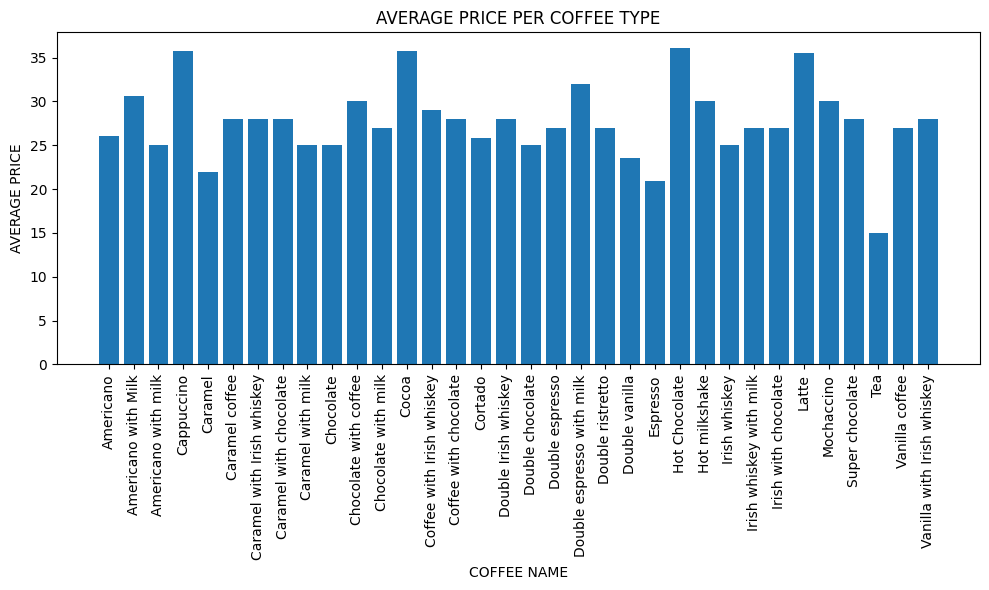

In [17]:
plt.figure(figsize=(10,6))
coffee_avg_price = data.groupby('coffee_name')['money'].mean().round(decimals=2)
plt.bar(coffee_avg_price.index, coffee_avg_price.values)
plt.xlabel('COFFEE NAME')
plt.ylabel('AVERAGE PRICE')
plt.title('AVERAGE PRICE PER COFFEE TYPE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**There are several prices of each coffee-type**

# Total revenue and average transaction

In [ ]:
data['money'].agg(['sum','mean'])

sum     122321.5800
mean        31.3806
Name: money, dtype: float64

**Total revenue = 122321.58 and average transaction per coffee = 31.38**

# Favorite coffee

In [ ]:
data['coffee_name'].value_counts().head(n=10)

coffee_name
Americano with Milk    824
Latte                  806
Americano              593
Cappuccino             516
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               152
Americano with milk     44
Irish whiskey           20
Name: count, dtype: int64

# Revenue by date

In [ ]:
daily_revenue=data.groupby('date',sort=False).sum('money')
daily_revenue

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,763.56
2025-03-20,685.60
2025-03-21,741.80


In [ ]:
daily_revenue.mean()

money    321.054016
dtype: float64

**Average daily transaction = 321.05**

In [ ]:
pd.to_datetime(data['time'],format='%H:%M',errors='coerce').dt.hour.value_counts()

time
10.0    363
11.0    316
16.0    306
12.0    271
17.0    268
15.0    267
19.0    253
18.0    247
14.0    245
13.0    240
21.0    210
20.0    177
22.0    123
23.0      3
Name: count, dtype: int64

**peak selling timing is 10 to 11 with 363**

# Save cleaned data as csv

In [ ]:
data.to_csv('coffee_data.csv',index=False)

# Average sale amount per coffee type

In [ ]:
data.groupby('coffee_name',sort=False).mean('money').round(decimals=2)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,money
coffee_name,
Latte,35.56
Hot Chocolate,36.07
Americano,26.03
Americano with Milk,30.67
Cocoa,35.71
Cortado,25.80
Espresso,20.97
Cappuccino,35.80
Tea,15.00


# Date with maximum sales

In [ ]:
daily_revenue.max()

money    979.08
dtype: float64

In [ ]:
daily_revenue[daily_revenue.values==daily_revenue.max().values].index

DatetimeIndex(['2025-02-21'], dtype='datetime64[ns]', name='date', freq=None)

**At 21/02/2025, Maximum sales(max revenue = 979.08 )**

# Peak selling day

In [ ]:
data['day']=data['date'].dt.day_name()
data['day'].value_counts()

day
Tuesday      604
Monday       591
Friday       586
Wednesday    553
Thursday     540
Saturday     531
Sunday       493
Name: count, dtype: int64

**Peak selling day is Tuesday with 604 sales**